In [1]:
#import libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import category_encoders as ce

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import data
df = pd.read_csv("./data/cleaned_data_with2.csv",index_col=0)

df.head()

,Price,city,History,Millage,Ratings,Year,Make,Model,Transmission,Age
0,4965000.0,Abia,foreign,149232.0,4.7,2015.0,Honda,Accord,Automatic,5.0
1,1280000.0,Accra,local,145078.0,4.4,2005.0,Toyota,Corolla,Automatic,15.0
2,1280000.0,Accra,local,91691.0,4.6,2008.0,Toyota,Corolla,Automatic,12.0
3,1567500.0,Lagos,local,234797.0,4.5,2004.0,Toyota,Corolla,Automatic,16.0
4,6065000.0,Lagos,foreign,145678.0,4.8,2013.0,Hyundai,Azera,Automatic,7.0


### Data Preparation

In [3]:
df['Price'] = df['Price']/1000000 #reduce the Price values

In [4]:
#drop the Year column
df = df.drop(['Year'],axis=1)

In [5]:
df.shape

(17227, 9)

In [6]:
df[df.Price <= 0]

,Price,city,History,Millage,Ratings,Make,Model,Transmission,Age
599,0.0,Lagos,foreign,10000.0,2.0,Toyota,RAV 4,Automatic,12.0
606,0.0,Lagos,foreign,9856.0,2.0,Honda,CR-V,Automatic,12.0
617,0.0,Lagos,foreign,0.0,2.0,Ford,Explorer,Automatic,4.0
618,0.0,Rivers,foreign,98000.0,2.0,Honda,CR-V,Automatic,12.0
621,0.0,Lagos,foreign,125425.0,2.0,Toyota,Camry,Automatic,12.0
...,...,...,...,...,...,...,...,...,...
14176,0.0,Lagos,foreign,92134.0,0.0,Mazda,Tribute,Manual,12.0
14177,0.0,Lagos,foreign,21344.0,0.0,Toyota,Corolla,Manual,14.0
14181,0.0,Lagos,foreign,153063.0,0.0,Toyota,Camry,Manual,23.0
14188,0.0,Lagos,foreign,0.0,0.0,Mercedes-Benz,E 350,Manual,7.0


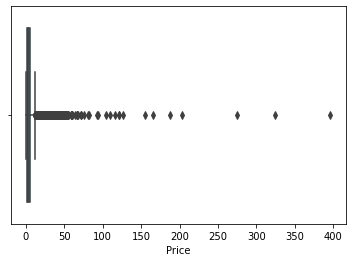

In [7]:
#find outliers!
sns.boxplot(x=df['Price'])

In [9]:
#check for outliers size

df[df.Price > 12]

,Price,city,History,Millage,Ratings,Make,Model,Transmission,Age
32,30.265,Lagos,foreign,76794.0,4.9,Lexus,LX 570,Automatic,3.0
52,23.115,Lagos,foreign,14464.0,5.0,Lexus,RX 350,Automatic,1.0
53,49.515,Lagos,foreign,14855.0,5.0,Land,Rover Range Rover Velar,Automatic,2.0
61,19.265,Lagos,foreign,19444.0,5.0,Lexus,RX 350,Automatic,4.0
83,12.115,Lagos,foreign,117011.0,4.7,Mercedes-Benz,ML 350,Automatic,6.0
...,...,...,...,...,...,...,...,...,...
17439,36.000,Lagos,foreign,49987.0,3.0,Rover,Range Rover Vogue,Automatic,12.0
17442,29.000,Lagos,foreign,23570.0,2.0,Land,Rover Range Rover Sport,Automatic,12.0
17443,16.000,Lagos,foreign,3931.0,1.0,Toyota,Camry,Automatic,12.0
17457,16.500,Lagos,foreign,89582.0,3.0,Lexus,Lx,Automatic,12.0


In [10]:
#drop all columns where Price is zero and greater than 50(million)
df = df.drop(df[df.Price > 12].index)

df = df.drop(df[df.Price <= 0].index)

In [11]:
df.shape

(12896, 9)

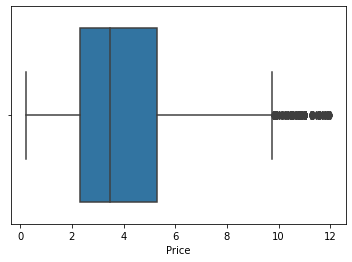

In [15]:
#find outliers!
sns.boxplot(x=df['Price'])

In [13]:
#split the data
X = df.drop(['Price'], axis=1)
y = df['Price']  #target variable

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,shuffle=True)
X_train.describe()

,Millage,Ratings,Age
count,9.672000e+03,9672.000000,9672.000000
mean,8.935672e+04,2.462779,11.754756
std,2.828926e+05,1.014915,3.574665
min,0.000000e+00,0.000000,1.000000
25%,0.000000e+00,2.000000,10.000000
50%,5.961000e+04,2.000000,12.000000
75%,1.010800e+05,3.000000,13.000000
max,9.912351e+06,5.000000,50.000000


In [16]:
#to display results
results = X_test

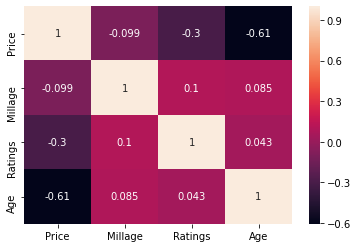

In [17]:
sns.heatmap(df.corr(),annot=True)

In [18]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

norm_cols = ['Millage','Ratings','Age']

# fit scaler on training data
norm = MinMaxScaler().fit(X_train[norm_cols])

# transform training data
X_train.loc[:,norm_cols] = norm.transform(X_train[norm_cols])

# transform testing data
X_test.loc[:,norm_cols] = norm.transform(X_test[norm_cols])

In [15]:
#transform training data
#y_train=(y_train-y_train.mean())/y_train.std()

#y_test = norm_y.transform(y_test)
#y_test=(y_test-y_test.mean())/y_test.std()

In [19]:
X_train.describe()

,Millage,Ratings,Age
count,9672.000000,9672.000000,9672.000000
mean,0.009015,0.492556,0.219485
std,0.028539,0.202983,0.072952
min,0.000000,0.000000,0.000000
25%,0.000000,0.400000,0.183673
50%,0.006014,0.400000,0.224490
75%,0.010197,0.600000,0.244898
max,1.000000,1.000000,1.000000


In [20]:
X_test.shape

(3224, 8)

In [21]:
#One Hot encoding for History and Transmission

ohe = ce.OneHotEncoder(cols=['History','Transmission'])  #instantiate the one-hot encoder

X_train = ohe.fit_transform(X_train)  #fit and transform ohe

X_test = ohe.transform(X_test)

In [22]:
# encodings for city, Make and Model

base_encoder = ce.BaseNEncoder(cols=['city','Make','Model'],base=3)

# fit and transform and you will get the encoded data
X_train = base_encoder.fit_transform(X_train)

X_test = base_encoder.transform(X_test)

In [23]:
X_train.shape

(9672, 24)

### Model Development

##### Linear Regression

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score

lr = LinearRegression() 
lr.fit(X_train,y_train)

LinearRegression()

In [25]:
y_train_lr = lr.predict(X_train)

print('The mean_absolute error is {}'.format(mean_absolute_error(y_train,y_train_lr)))
print('The r2_error is {}'.format(r2_score(y_train,y_train_lr)))

The mean_absolute error is 1.322369951483664
The r2_error is 0.49496807020870814


In [26]:
y_test_lr = lr.predict(X_test)

print('The mean_absolute error is {}'.format(mean_absolute_error(y_test,y_test_lr)))
print('The r2_error is {}'.format(r2_score(y_test,y_test_lr)))

The mean_absolute error is 1.3322398682537222
The r2_error is 0.486436964331028


##### K-Nearest Neigbours

In [36]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [37]:
y_train_knn = knn.predict(X_train)

print('The mean_absolute error for train is {}'.format(mean_absolute_error(y_train,y_train_knn)))
print('The r2_error for train is {}'.format(r2_score(y_train,y_train_knn)))

The mean_absolute error for train is 0.6072932001309622
The r2_error for train is 0.8447419372681775


In [38]:
y_test_knn = knn.predict(X_test)

print('The mean_absolute error is {}'.format(mean_absolute_error(y_test,y_test_knn)))
print('The r2_error is {}'.format(r2_score(y_test,y_test_knn)))

The mean_absolute error is 0.814039775330852
The r2_error is 0.7145585182815066


##### Random Forest

In [39]:
from sklearn.ensemble import RandomForestRegressor,StackingRegressor

rf = RandomForestRegressor(n_estimators= 1000, max_depth=5, random_state=42,n_jobs=-1,criterion='mse')
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=5, n_estimators=1000, n_jobs=-1,
                      random_state=42)

In [40]:
y_train_rf = rf.predict(X_train)

print('The mean_absolute error is {}'.format(mean_absolute_error(y_train,y_train_rf)))
print('The r2_error is {}'.format(r2_score(y_train,y_train_rf)))

The mean_absolute error is 1.040127979814183
The r2_error is 0.6453658869597994


In [41]:
y_test_rf = rf.predict(X_test)

print('The mean_absolute error is {}'.format(mean_absolute_error(y_test,y_test_rf)))
print('The r2_error is {}'.format(r2_score(y_test,y_test_rf)))

The mean_absolute error is 1.0644513942898692
The r2_error is 0.6259949211549232


##### Gradient Boosted Trees

In [42]:
import xgboost as xgb

xgbr = xgb.XGBRegressor(max_depth=5,objective='reg:squarederror',learning_rate=0.1,
                        n_estimators=1000,n_jobs=1) #xgboost
xgbr.fit(X_train,y_train)

XGBRegressor(max_depth=5, n_estimators=1000, objective='reg:squarederror')

In [43]:
y_train_xgb = xgbr.predict(X_train)

print('The mean_absolute error is {}'.format(mean_absolute_error(y_train,y_train_xgb)))
print('The r2_error is {}'.format(r2_score(y_train,y_train_xgb)))

The mean_absolute error is 0.44765120088177385
The r2_error is 0.9293824330944125


In [44]:
y_test_xgb = xgbr.predict(X_test)

print('The mean_absolute error is {}'.format(mean_absolute_error(y_test,y_test_xgb)))
print('The r2_error is {}'.format(r2_score(y_test,y_test_xgb)))

The mean_absolute error is 0.7695371820999766
The r2_error is 0.7749077104898583


In [49]:
#build a range predictor
from sklearn.ensemble import GradientBoostingRegressor

# Set lower and upper quantile
LOWER_ALPHA = 0.1
UPPER_ALPHA = 0.9

# Each model has to be separate
lower_model = GradientBoostingRegressor(loss="quantile",alpha=LOWER_ALPHA,max_depth=5,
                                        criterion='friedman_mse',learning_rate=0.1,n_estimators=1000)

# The mid model will use the default loss
mid_model = GradientBoostingRegressor(loss="ls",max_depth=5,
                                        criterion='friedman_mse',learning_rate=0.1,n_estimators=1000)

upper_model = GradientBoostingRegressor(loss="quantile", alpha=UPPER_ALPHA,max_depth=5,
                                        criterion='friedman_mse',learning_rate=0.1,n_estimators=1000)


# Fit models
lower_model.fit(X_train, y_train)
mid_model.fit(X_train, y_train)
upper_model.fit(X_train, y_train)

# Record actual values on test set
predictions = pd.DataFrame(y_test)

# Predict
predictions['lower'] = lower_model.predict(X_test)
predictions['mid'] = mid_model.predict(X_test)
predictions['upper'] = upper_model.predict(X_test)

#### Stacking Regressor

In [45]:
estimators = [('knn',knn),
              ('xgb',xgbr)]

final_estimator = xgb.XGBRegressor(max_depth=4,objective='reg:squarederror',learning_rate=0.08,
                        n_estimators=1000,n_jobs=1)

stk_reg = StackingRegressor(estimators=estimators,
                        final_estimator=final_estimator)

stk_reg.fit(X_train,y_train)

StackingRegressor(estimators=[('knn', KNeighborsRegressor(n_neighbors=3)),
                              ('xgb',
                               XGBRegressor(max_depth=5, n_estimators=1000,
                                            objective='reg:squarederror'))],
                  final_estimator=XGBRegressor(learning_rate=0.08, max_depth=4,
                                               n_estimators=1000,
                                               objective='reg:squarederror'))

In [46]:
y_train_stk = stk_reg.predict(X_train)

print('The mean_absolute error is {}'.format(mean_absolute_error(y_train,y_train_stk)))
print('The r2_error is {}'.format(r2_score(y_train,y_train_stk)))

The mean_absolute error is 0.5056482219319192
The r2_error is 0.9052281672533786


In [47]:
y_test_stk = stk_reg.predict(X_test)

print('The mean_absolute error is {}'.format(mean_absolute_error(y_test,y_test_stk)))
print('The r2_error is {}'.format(r2_score(y_test,y_test_stk)))

The mean_absolute error is 0.7579262910667223
The r2_error is 0.7735088255357655


#### Result Presentation

In [51]:
results.loc[:,'real_price'] = y_test*1000000
results.loc[:,'predicted_price'] = y_test_xgb*1000000
results[['upper','lower']] = predictions[['upper','lower']]*1000000

# inverse_transform testing data
results.loc[:,norm_cols] = norm.inverse_transform(results[norm_cols])

results.head(20)

,city,History,Millage,Ratings,Make,Model,Transmission,Age,real_price,predicted_price,upper,lower
7348,Lagos,foreign,8.174617e+11,10.0,Lexus,ES 330,Automatic,785.0,2717500.0,2.694957e+06,3.146053e+06,2.179168e+06
6626,Lagos,foreign,6.839522e+11,10.0,Toyota,RAV 4,Automatic,197.0,10300000.0,9.327804e+06,1.031999e+07,7.079886e+06
8,Accra,local,0.000000e+00,20.0,Toyota,Avensis,Automatic,491.0,2085000.0,6.415174e+06,7.187811e+06,1.200518e+06
5013,Lagos,foreign,6.379589e+10,10.0,Toyota,Camry,Automatic,589.0,3120000.0,3.474908e+06,5.187416e+06,2.259978e+06
884,Lagos,foreign,7.929881e+08,10.0,Acura,TL,Automatic,540.0,3407500.0,2.314425e+06,5.301590e+06,2.578108e+06
8683,Kaduna,foreign,0.000000e+00,10.0,Mercedes-Benz,GLK 350,Automatic,344.0,8815000.0,8.929449e+06,1.061120e+07,5.463924e+06
6752,Lagos,foreign,0.000000e+00,10.0,Mercedes-Benz,E 350,Automatic,393.0,5515000.0,7.299375e+06,9.045599e+06,4.734829e+06
13600,Lagos,foreign,6.475937e+11,10.0,Toyota,Avalon,Automatic,638.0,3120000.0,3.254552e+06,4.148549e+06,2.739552e+06
3134,Lagos,foreign,8.775603e+11,10.0,Toyota,Avalon,Automatic,540.0,3120000.0,3.578609e+06,5.227927e+06,2.768410e+06
14245,Ilorin,local,1.313872e+12,20.0,Peugeot,Expert,Manual,589.0,872500.0,1.954119e+06,2.854698e+06,6.539166e+05


In [38]:
#next make range predictions
#cross validation ===